<a href="https://colab.research.google.com/github/danbikiki/blu2/blob/master/200818_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:

import sklearn 
print(sklearn.__version__)

0.22.2.post1


#1. 개요

###(1) 패키지 불러오기

### (2)데이터 불러오기

In [32]:
from sklearn.datasets import load_iris
iris=load_iris() #bunch 형태의 데이터셋으로 구성

#독립변수 구성된 데이터
iris_data=iris.data

#종속변수
iris_label=iris.target

print('iris target값=',iris_label[[0,50,100]])


iris target값= [0 1 2]


### (3)데이터 전처리
-상황: numpy형태, 리스트
-방법:pandas활용,데이터프레임

In [33]:
import pandas as pd

In [34]:
iris_dataframe=pd.DataFrame(iris_data)
iris_dataframe

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
iris_dataframe=pd.DataFrame(iris_data,columns={'sepal_length','sepal_width','petal_length','petal_width'})
iris_dataframe

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
iris_dataframe.describe()
  

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### (4)데이터 시각화
 -시각화 위한 전처리

In [37]:
from sklearn import datasets
import pandas as pd

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris=sklearn_to_df(datasets.load_iris())
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
temp_data = df_iris.copy()

replace_fct = {0: 'setosa', 1: 'versicolor', 2: "virginica"}
temp_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"] 
temp_data['species'] = temp_data['species'].map(replace_fct)
temp_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


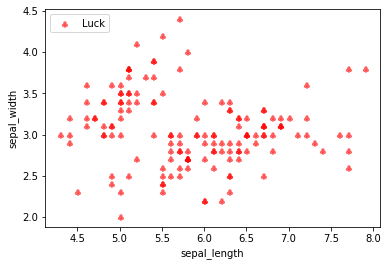

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x=temp_data['sepal_length']
y=temp_data['sepal_width']

plt.scatter(x, y, c="r", alpha=0.5, marker=r'$\clubsuit$',label="Luck")
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc='upper left')
plt.show()

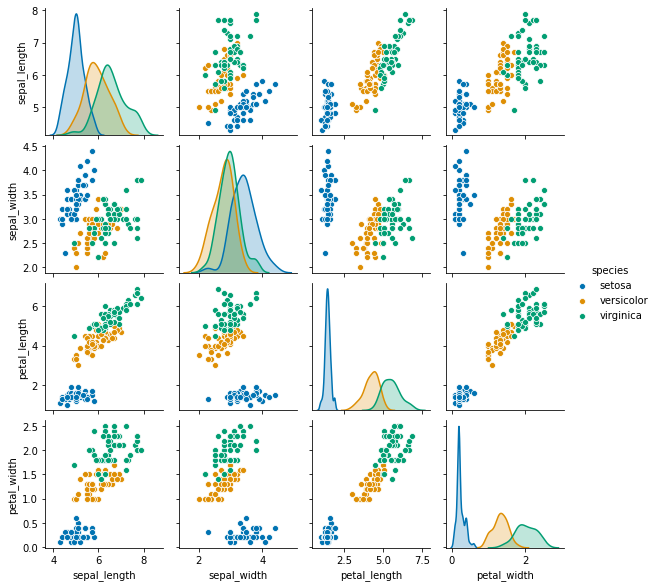

In [40]:
import seaborn as sns
sns.pairplot(temp_data, hue="species", height = 2, palette = 'colorblind');

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_label,test_size=0.2,random_state=1)

#array=리스트,넘파이,판다스 데이터프레임 등
#test_size=비율(훈련데이터/테스터용 데이터)
#random state=실험의 재현성 위한 코드

###(5) 데이터셋 분리
-학습용 데이터와 테스터용 데이터 분리

### (6) 머신러닝 모형 학습

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier(random_state=1)

dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

###(7) 모형 테스트
-모형 예측

In [44]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(x_test)
print('The accuracy of the Decision Tree is: {:.3f}'.format(accuracy_score(pred,y_test)))

The accuracy of the Decision Tree is: 0.967


Text(0.5, 1.0, 'Confusion Matrix')

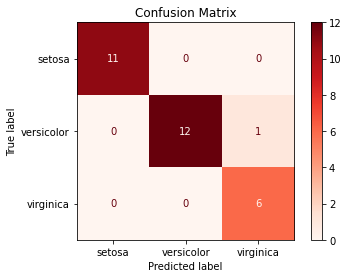

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(dt_clf, 
                             x_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix')

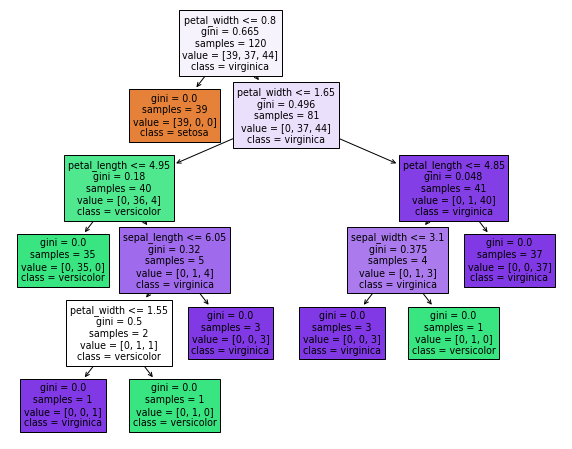

In [47]:
import matplotlib.pyplot as plt

explt_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fct_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}

plt.figure(figsize = (10,8))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True);